## TIPO DI SPEDIZIONI INTERNE ALL'ITALIA E IL LORO NUMERO

Abbiamo iniziato con l'analizzare il numero di spedizioni interne e creando un grafico per analizzare le tipologie di spedizione e contare le righe vuote.

Numero di spedizioni dall'Italia all'Italia: 11755


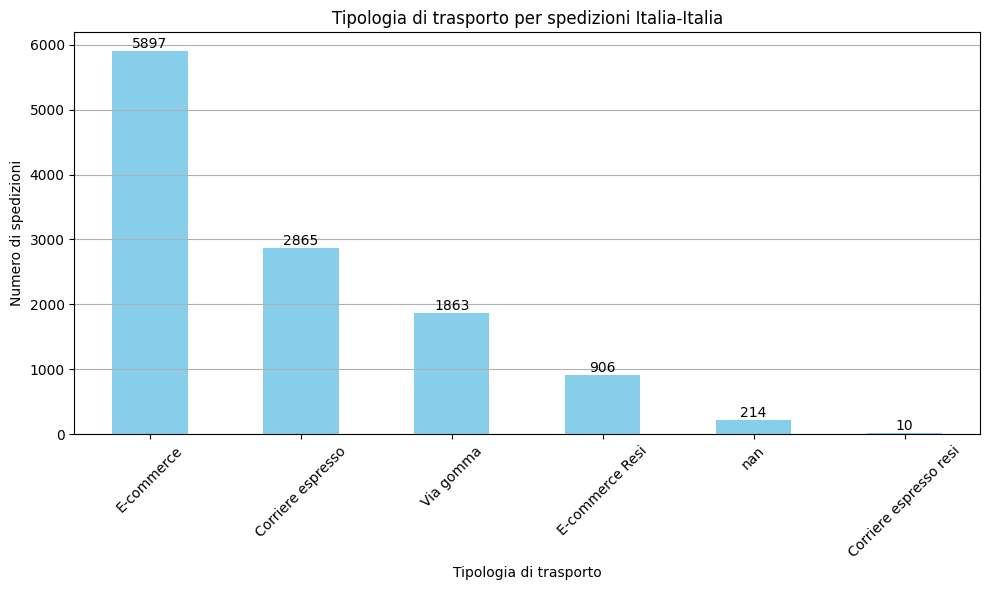

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il file CSV
df = pd.read_csv('delivery_data.csv')

# Filtra le spedizioni dall'Italia all'Italia
italy_to_italy = df[(df['DEPARTURE_COUNTRY'] == 'IT') & (df['ARRIVAL_COUNTRY'] == 'IT')]

# Conta il numero di spedizioni dall'Italia all'Italia
num_shipments = len(italy_to_italy)
print(f"Numero di spedizioni dall'Italia all'Italia: {num_shipments}")

# Analizza la colonna SERVICETYPE
service_type_counts = italy_to_italy['SERVICETYPE'].value_counts(dropna=False)

# Crea un grafico a barre
plt.figure(figsize=(10, 6))
service_type_counts.plot(kind='bar', color='skyblue')
plt.title('Tipologia di trasporto per spedizioni Italia-Italia')
plt.xlabel('Tipologia di trasporto')
plt.ylabel('Numero di spedizioni')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Aggiungi il numero di tipi di spedizioni sotto il grafico
for index, value in enumerate(service_type_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Mostra il grafico
plt.tight_layout()
plt.show()

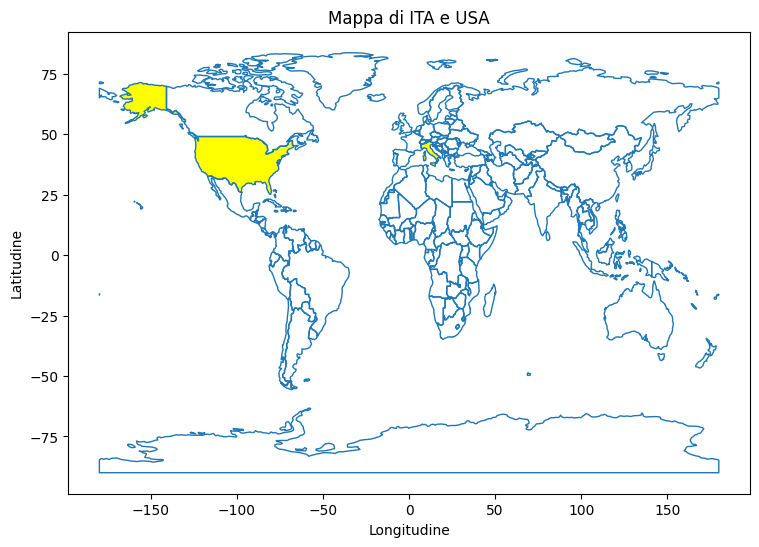

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Carica il GeoDataFrame
world = gpd.read_file('./ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# Filtra per i paesi desiderati
country_coords = world[world['SOV_A3'].isin(['ITA', 'US1'])]

# Crea un grafico
fig, ax = plt.subplots(figsize=(10, 6))

# Disegna la mappa del mondo
world.boundary.plot(ax=ax, linewidth=1)

# Disegna i paesi filtrati
if not country_coords.empty:
    country_coords.plot(ax=ax, color='yellow')

# Imposta i titoli e le etichette
ax.set_title('Mappa di ITA e USA')
ax.set_xlabel('Longitudine')
ax.set_ylabel('Latitudine')

plt.show()

Unique Departure Countries:
['IT' 'US']
Unique Arrival Countries:
['IT' 'US']
Filtered DataFrame:
       Unnamed: 0        SERVICETYPE VEHICLETYPE DEPARTURE_COUNTRY  \
6               7  Corriere espresso     Express                IT   
7               8  Corriere espresso     Express                IT   
8               9  Corriere espresso     Express                IT   
9              10  Corriere espresso     Express                IT   
11             12  Corriere espresso     Express                IT   
...           ...                ...         ...               ...   
14239       14240         E-commerce     Express                IT   
14240       14241         E-commerce     Express                IT   
14266       14267  Corriere espresso     Express                IT   
14267       14268  Corriere espresso     Express                IT   
14286       14287         E-commerce     Express                IT   

       DEPARTURE_ZIPCODE ARRIVAL_COUNTRY  ARRIVAL_ZIPCODE  \


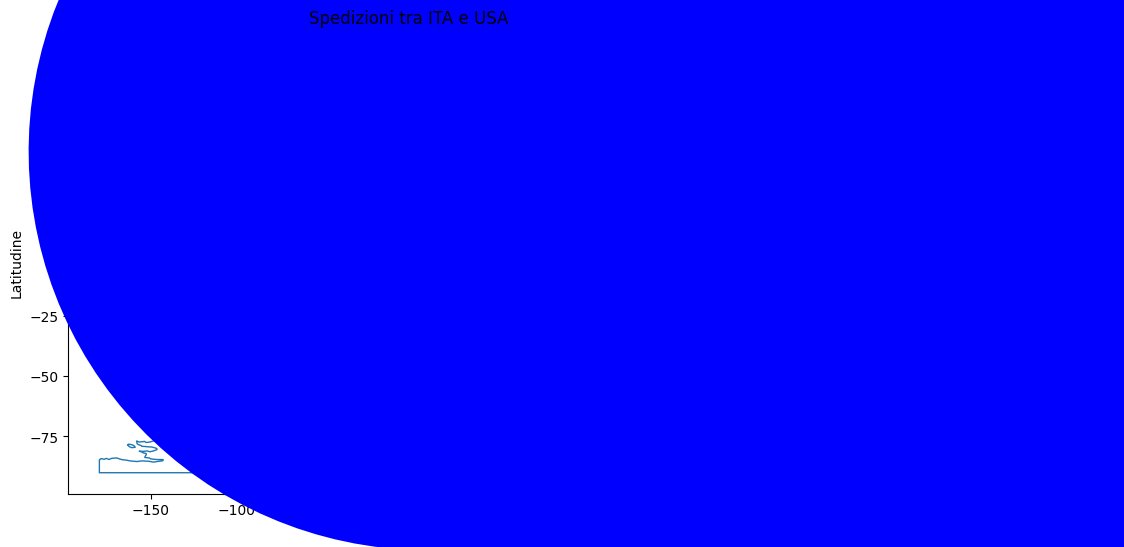

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Carica il file CSV
df = pd.read_csv('delivery_data.csv')

# Stampa i valori unici per i paesi di partenza e arrivo
print("Unique Departure Countries:")
print(df['DEPARTURE_COUNTRY'].unique())
print("Unique Arrival Countries:")
print(df['ARRIVAL_COUNTRY'].unique())

# Filtra i dati per le spedizioni richieste
filtered_df = df[(df['DEPARTURE_COUNTRY'].isin(['IT'])) & 
                 (df['ARRIVAL_COUNTRY'].isin(['US']))]

# Stampa il DataFrame filtrato
print("Filtered DataFrame:")
print(filtered_df)

# Conta le spedizioni per ogni combinazione di paesi
shipment_counts = filtered_df.groupby(['DEPARTURE_COUNTRY', 'ARRIVAL_COUNTRY']).size().reset_index(name='counts')

# Stampa i conteggi delle spedizioni
print("Shipment Counts:")
print(shipment_counts)

# Carica il GeoDataFrame per le spedizioni
world = gpd.read_file('./ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# Filtra per i paesi desiderati
country_coords = world[world['SOV_A3'].isin(['ITA', 'US1'])]

# Crea un grafico
fig, ax = plt.subplots(figsize=(10, 6))

# Disegna la mappa del mondo
world.boundary.plot(ax=ax, linewidth=1)

# Disegna i paesi filtrati
if not country_coords.empty:
    country_coords.plot(ax=ax, color='yellow')

# Aggiungi le frecce per le spedizioni
for index, row in shipment_counts.iterrows():
    departure_country = row['DEPARTURE_COUNTRY']
    arrival_country = row['ARRIVAL_COUNTRY']
    
    # Ottieni le geometrie dei paesi di partenza e arrivo
    departure_geom = country_coords[country_coords['SOV_A3'] == 'ITA']
    arrival_geom = country_coords[country_coords['SOV_A3'] == 'US1']
    
    # Controlla se ci sono geometrie corrispondenti
    if not departure_geom.empty and not arrival_geom.empty:
        departure_geom = departure_geom.geometry.values[0]
        arrival_geom = arrival_geom.geometry.values[0]
        
        # Calcola il centroide per le frecce
        departure_point = departure_geom.centroid
        arrival_point = arrival_geom.centroid
        
        # Stampa i punti di partenza e arrivo
        print(f"Departure Point: {departure_point}, Arrival Point: {arrival_point}")
        
        # Disegna la freccia
        ax.annotate('', xy=(arrival_point.x, arrival_point.y), xytext=(departure_point.x, departure_point.y),
                    arrowprops=dict(arrowstyle='->', color='blue', lw=row['counts']))
    else:
        print(f"Geometria non trovata per: {departure_country} o {arrival_country}")

# Imposta i titoli e le etichette
ax.set_title('Spedizioni tra ITA e USA')
ax.set_xlabel('Longitudine')
ax.set_ylabel('Latitudine')

# Mostra il grafico
plt.show()

In [4]:
import pandas as pd

# Carica il file CSV
file_path = 'delivery_data.csv'
data = pd.read_csv(file_path)  # Usa '\t' se il file è separato da tabulazioni

# Filtra le righe con valori positivi nella colonna DELIVERY_TIME_HH
filtered_data = data[data['DELIVERY_TIME_HH'] >= 0]

# Rimuovi le righe con caselle vuote
filtered_data = filtered_data.dropna()

# Salva il risultato in un nuovo file CSV
output_file_path = 'filtered_delivery_data.csv'
filtered_data.to_csv(output_file_path, index=False, sep='\t')

print(f"File filtrato e senza righe vuote salvato come: {output_file_path}")

File filtrato e senza righe vuote salvato come: filtered_delivery_data.csv


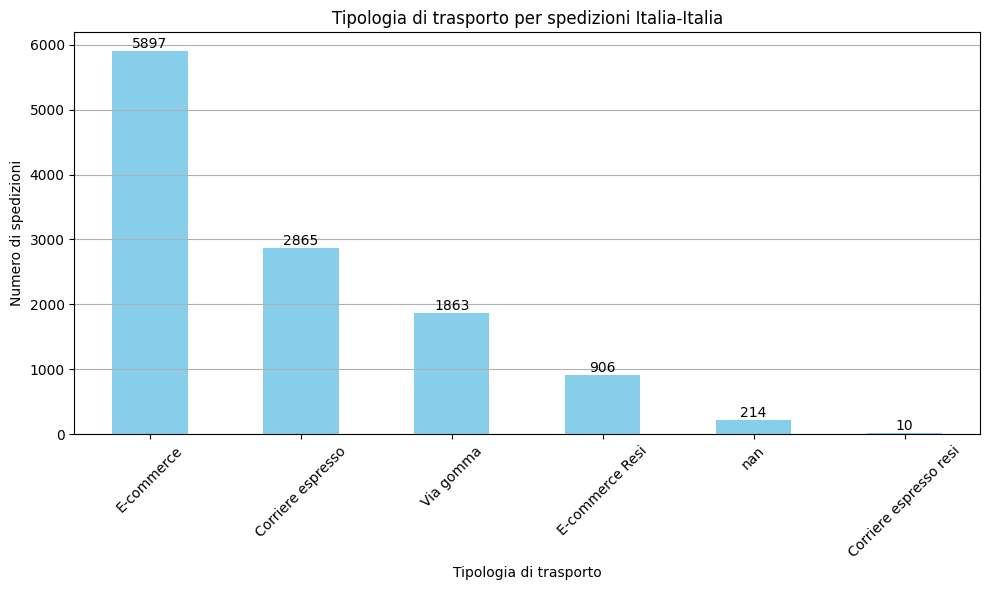

Nessun dato disponibile per: Tipologia di trasporto per spedizioni US-Italia


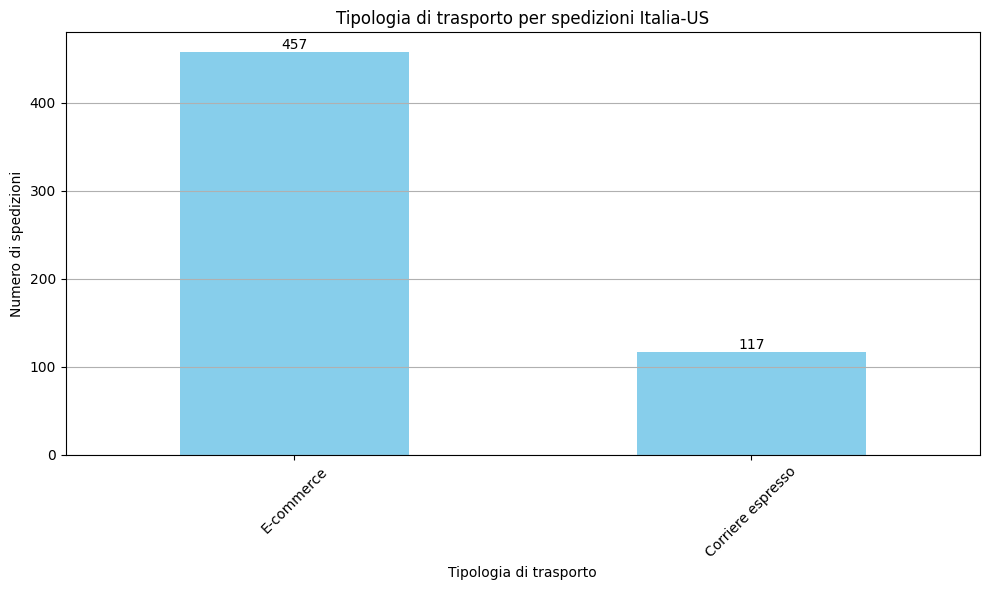

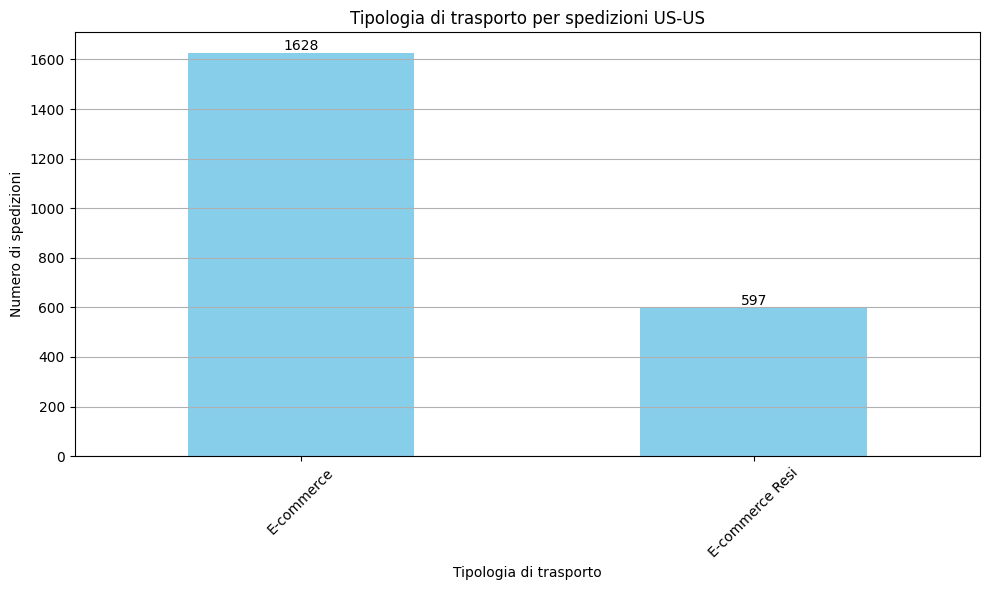

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il file CSV
df = pd.read_csv('delivery_data.csv')

# Funzione per creare grafico a barre
def create_bar_chart(data, title):
    if data.empty:
        print(f"Nessun dato disponibile per: {title}")
        return
    
    service_type_counts = data['SERVICETYPE'].value_counts(dropna=False)
    
    plt.figure(figsize=(10, 6))
    service_type_counts.plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.xlabel('Tipologia di trasporto')
    plt.ylabel('Numero di spedizioni')
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    # Aggiungi il numero di tipi di spedizioni sotto il grafico
    for index, value in enumerate(service_type_counts):
        plt.text(index, value, str(value), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Filtra le spedizioni dall'Italia all'Italia
italy_to_italy = df[(df['DEPARTURE_COUNTRY'] == 'IT') & (df['ARRIVAL_COUNTRY'] == 'IT')]
create_bar_chart(italy_to_italy, 'Tipologia di trasporto per spedizioni Italia-Italia')

# Filtra le spedizioni dagli Stati Uniti all'Italia
us_to_italy = df[(df['DEPARTURE_COUNTRY'] == 'US') & (df['ARRIVAL_COUNTRY'] == 'IT')]
create_bar_chart(us_to_italy, 'Tipologia di trasporto per spedizioni US-Italia')

# Filtra le spedizioni dall'Italia agli Stati Uniti
italy_to_us = df[(df['DEPARTURE_COUNTRY'] == 'IT') & (df['ARRIVAL_COUNTRY'] == 'US')]
create_bar_chart(italy_to_us, 'Tipologia di trasporto per spedizioni Italia-US')

# Filtra le spedizioni dagli Stati Uniti agli Stati Uniti
us_to_us = df[(df['DEPARTURE_COUNTRY'] == 'US') & (df['ARRIVAL_COUNTRY'] == 'US')]
create_bar_chart(us_to_us, 'Tipologia di trasporto per spedizioni US-US')

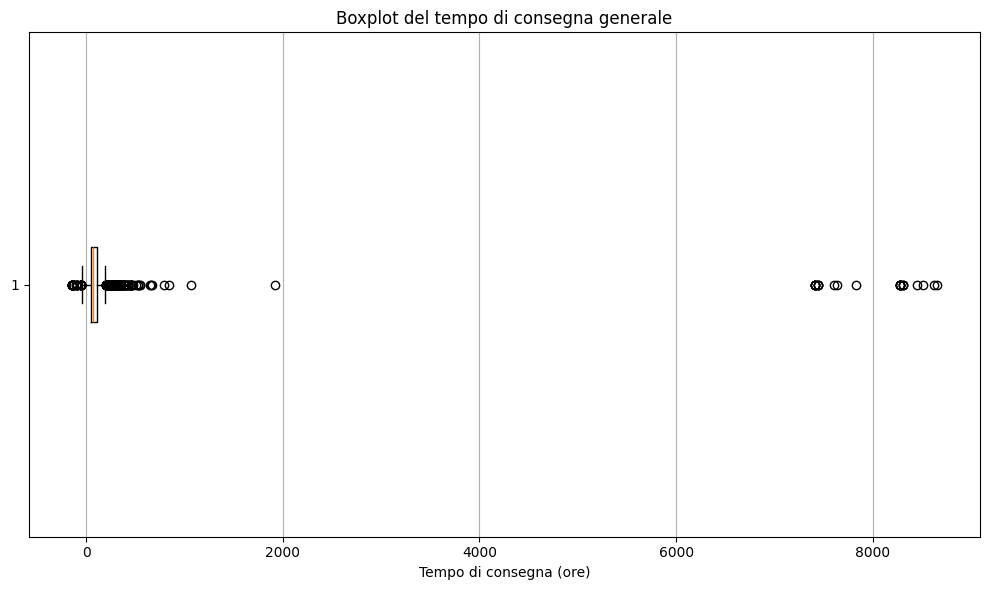

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il file CSV
df = pd.read_csv('filtered_delivery_data.csv')

# Funzione per creare un boxplot generale
def create_general_boxplot(data):
    if data.empty or 'DELIVERY_TIME_HH' not in data.columns:
        print("Nessun dato disponibile per il boxplot.")
        return
    
    plt.figure(figsize=(10, 6))
    plt.boxplot(data['DELIVERY_TIME_HH'].dropna(), vert=False)
    plt.title('Boxplot del tempo di consegna generale')
    plt.xlabel('Tempo di consegna (ore)')
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

# Crea il boxplot generale
create_general_boxplot(df)

In [7]:
import pandas as pd

# Leggi il file CSV
df = pd.read_csv('delivery_data.csv')

# Modifica l'anno nella colonna 'ACTUAL_DELIVERY_DATE'
df['ACTUAL_DELIVERY_DATE'] = df['ACTUAL_DELIVERY_DATE'].str.replace('2022', '2023')

# Scrivi il risultato in un nuovo file CSV
df.to_csv('filtered_delivery_data.csv', index=False)

print("Le date sono state aggiornate e salvate in 'output.csv'.")

Le date sono state aggiornate e salvate in 'output.csv'.


In [8]:
import pandas as pd

# Aprire il file CSV
df = pd.read_csv('filtered_delivery_data.csv')

# Controllare i primi valori delle colonne per identificare eventuali problemi
print("Valori di SHIPPING_DATE:")
print(df['SHIPPING_DATE'].head(10))
print("\nValori di ACTUAL_DELIVERY_DATE:")
print(df['ACTUAL_DELIVERY_DATE'].head(10))

# Convertire le colonne in formato datetime, gestendo gli errori
df['SHIPPING_DATE'] = pd.to_datetime(df['SHIPPING_DATE'], errors='coerce')
df['ACTUAL_DELIVERY_DATE'] = pd.to_datetime(df['ACTUAL_DELIVERY_DATE'], errors='coerce')

# Controllare se ci sono valori NaT (Not a Time) dopo la conversione
print("\nValori NaT in SHIPPING_DATE:")
print(df[df['SHIPPING_DATE'].isna()])
print("\nValori NaT in ACTUAL_DELIVERY_DATE:")
print(df[df['ACTUAL_DELIVERY_DATE'].isna()])

# Calcolare il tempo di consegna in ore solo se le date sono valide
df['DELIVERY_TIME_HH'] = (df['ACTUAL_DELIVERY_DATE'] - df['SHIPPING_DATE']).dt.total_seconds() / 3600

# Salvare il DataFrame aggiornato in un nuovo file CSV (opzionale)
df.to_csv('filtered_delivery_data.csv', index=False)

# Mostrare il DataFrame aggiornato
print(df[['Unnamed: 0', 'DELIVERY_TIME_HH']])

Valori di SHIPPING_DATE:
0    2023-01-11 00:00:14
1    2023-01-11 00:00:14
2    2023-01-11 00:00:14
3    2023-01-11 00:00:14
4    2023-01-11 00:00:14
5    2023-01-11 00:00:14
6    2023-01-11 00:00:14
7    2023-01-11 00:00:14
8    2023-01-11 00:00:14
9    2023-01-11 00:00:14
Name: SHIPPING_DATE, dtype: object

Valori di ACTUAL_DELIVERY_DATE:
0    2023-11-16 00:00:14
1    2023-11-16 00:00:14
2    2023-11-17 00:00:14
3    2023-11-16 00:00:14
4    2023-11-16 00:00:14
5    2023-11-16 00:00:14
6    2023-11-17 00:00:14
7    2023-11-17 00:00:14
8    2023-11-17 00:00:14
9    2023-11-16 00:00:14
Name: ACTUAL_DELIVERY_DATE, dtype: object

Valori NaT in SHIPPING_DATE:
       Unnamed: 0        SERVICETYPE VEHICLETYPE DEPARTURE_COUNTRY  \
24             25  Corriere espresso     Express                IT   
25             26  Corriere espresso     Express                IT   
74             75  Corriere espresso     Express                IT   
98             99  Corriere espresso     Express       